**Imports necessary libraries**

In [ ]:
# pip install anytree

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx

from anytree import Node, RenderTree
from anytree.exporter import DotExporter

import pandas as pd
import os
from collections import defaultdict

import seaborn as sns


**This code for generating a visual representation of the dataset structure used in our study. The code creates a directed graph using NetworkX, where nodes represent different categories of data: the root node is "Datasets," branching into two primary sources "BBC (Long Text)" and "Wikipedia (Short Text)." Each of these sources further divides into human and AI-generated texts, with the latter produced by three different large language models: "AI (gpt-3.5-turbo-0125)", "AI (gemini-pro)", and "AI (open-mistral-7b)." 
The graph layout is designed hierarchically to reflect the organizational structure of the datasets. Node colors are used to differentiate between human texts (green) and AI-generated texts (grey), and the overall visualization includes annotations to indicate that the datasets are available in three languages: English, Spanish, and French.**

In [2]:
# Create nodes
root = Node("Datasets")
bbc = Node("BBC", parent=root)
wikipedia = Node("Wikipedia", parent=root)

# Subnodes for BBC
bbc_human = Node("Human", parent=bbc)
bbc_ai_gpt = Node("AI (gpt-3.5-turbo-0125)", parent=bbc)
bbc_ai_gemini = Node("AI (gemini-pro)", parent=bbc)
bbc_ai_mistral = Node("AI (open-mistral-7b)", parent=bbc)

# Subnodes for Wikipedia
wiki_human = Node("Human", parent=wikipedia)
wiki_ai_gpt = Node("AI (gpt-3.5-turbo-0125)", parent=wikipedia)
wiki_ai_gemini = Node("AI (gemini-pro)", parent=wikipedia)
wiki_ai_mistral = Node("AI (open-mistral-7b)", parent=wikipedia)

# Print the tree to the console
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))



Datasets
├── BBC
│   ├── Human
│   ├── AI (gpt-3.5-turbo-0125)
│   ├── AI (gemini-pro)
│   └── AI (open-mistral-7b)
└── Wikipedia
    ├── Human
    ├── AI (gpt-3.5-turbo-0125)
    ├── AI (gemini-pro)
    └── AI (open-mistral-7b)


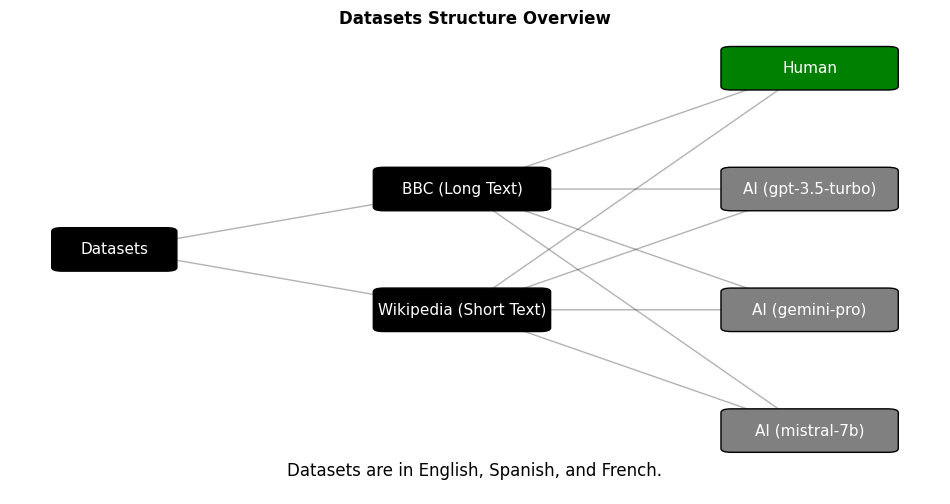

In [6]:
# Define the directory where plots will be saved
save_path = 'C:/Users/amirm/Desktop/MONASH/Thesis/Working/Prepare/Images'

# Create a directed graph
G = nx.DiGraph()

# Adding nodes with subset information
nodes_with_subsets = {
    "Datasets": 0,  # Root
    "BBC (Long Text)": 1,  # First split
    "Wikipedia (Short Text)": 1,  # First split
    "Human": 2,  # Second level
    "AI (gpt-3.5-turbo)": 2,
    "AI (gemini-pro)": 2,
    "AI (mistral-7b)": 2
}

for node, subset in nodes_with_subsets.items():
    G.add_node(node, subset=subset)

# Add edges
G.add_edge("Datasets", "BBC (Long Text)")
G.add_edge("Datasets", "Wikipedia (Short Text)")
G.add_edges_from([
    ("BBC (Long Text)", "Human"),
    ("BBC (Long Text)", "AI (gpt-3.5-turbo)"),
    ("BBC (Long Text)", "AI (gemini-pro)"),
    ("BBC (Long Text)", "AI (mistral-7b)")
])
G.add_edges_from([
    ("Wikipedia (Short Text)", "Human"),
    ("Wikipedia (Short Text)", "AI (gpt-3.5-turbo)"),
    ("Wikipedia (Short Text)", "AI (gemini-pro)"),
    ("Wikipedia (Short Text)", "AI (mistral-7b)")
])

# Position nodes using a hierarchical layout
pos = nx.multipartite_layout(G, subset_key="subset")

# Define specific sizes for each layer
sizes = {0: (0.2, 0.2), 1: (0.3, 0.2), 2: (0.3, 0.2)}

# Define color mapping
colors = {"Human": "green", 
          "AI (gpt-3.5-turbo)": "grey",
          "AI (gemini-pro)": "grey",
          "AI (mistral-7b)": "grey",
         }
default_color = "black"  # For nodes not specified in colors

# Setup the figure to be wider
plt.figure(figsize=(12, 6))

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Initialize variables to track the min and max positions for setting plot limits
min_x, max_x = float('inf'), float('-inf')
min_y, max_y = float('inf'), float('-inf')

# Draw nodes with different sizes and colors depending on their subset and type
for node, (x, y) in pos.items():
    subset = nodes_with_subsets[node]
    width, height = sizes[subset]
    node_color = colors.get(node, default_color)  # Use specific color or default
    bbox = patches.FancyBboxPatch((x - width / 2, y - height / 2), width, height, 
                                  boxstyle="round,pad=0.02,rounding_size=0.02", 
                                  edgecolor="black", facecolor=node_color)
    plt.gca().add_patch(bbox)
    plt.gca().text(x, y, node, ha='center', va='center', fontsize=11, color='white')  
    
    # Update the min and max coordinates
    min_x = min(min_x, x - width / 2)
    max_x = max(max_x, x + width / 2)
    min_y = min(min_y, y - height / 2)
    max_y = max(max_y, y + height / 2)

# Add a note about the available languages, centered at the bottom
note_text = "Datasets are in English, Spanish, and French."
plt.text((min_x + max_x) / 2, min_y - 0.15, note_text, fontsize=12, color='black', ha='center')  

# Set the limits dynamically based on the nodes
plt.xlim(min_x - 0.1, max_x + 0.1)
plt.ylim(min_y - 0.25, max_y + 0.1)  # Adjusted for text space

# Set title and turn off axis
plt.title("Datasets Structure Overview", fontsize=12, color='black', weight='bold')
plt.axis('off')

# Save the figure
plt.savefig(f"{save_path}/Dataset_Structure_Overview.png", format='png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


**This code combines pairs of CSV files from a specified source directory, based on core names, and saves the merged files into a target directory, streamlining data organization and processing.**

In [31]:
def combine_csv_files(source_directory, target_directory):
    # Create a dictionary to hold file groupings
    file_groups = defaultdict(list)

    # Read all files in the source directory
    for filename in os.listdir(source_directory):
        if filename.endswith('.csv'):
            # Remove suffixes to identify groups
            core_name = filename.replace('_Continue', '').replace('_Topic', '')
            file_groups[core_name].append(filename)

    # Ensure the target directory exists
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    # Process each group of files
    for core_name, filenames in file_groups.items():
        if len(filenames) == 2:  # Check there are exactly two files to combine
            # Combine the files
            dfs = [pd.read_csv(os.path.join(source_directory, f)) for f in filenames]
            combined_df = pd.concat(dfs, ignore_index=True)

            # New filename based on the core name
            new_filename = f"{core_name}"
            combined_df.to_csv(os.path.join(target_directory, new_filename), index=False)
            print(f"Combined file saved as {new_filename}")


In [32]:
source_directory = 'C:/Users/amirm/Desktop/MONASH/Thesis/Working/Prepare/Code/Gen_Ai_Text/Combine_Datasets'
target_directory = 'C:/Users/amirm/Desktop/MONASH/Thesis/Working/Prepare/Code/Gen_Ai_Text/Combine_Datasets/Output_Files'
combine_csv_files(source_directory, target_directory)

Combined file saved as BBC_English_Ai_(gemini-pro).csv
Combined file saved as BBC_English_Ai_(gpt-3.5-turbo-0125).csv
Combined file saved as BBC_English_Ai_(open-mistral-7b).csv
Combined file saved as BBC_English_Human.csv
Combined file saved as BBC_French_Ai_(gemini-pro).csv
Combined file saved as BBC_French_Ai_(gpt-3.5-turbo-0125).csv
Combined file saved as BBC_French_Ai_(open-mistral-7b).csv
Combined file saved as BBC_French_Human.csv
Combined file saved as BBC_Spanish_Ai_(gemini-pro).csv
Combined file saved as BBC_Spanish_Ai_(gpt-3.5-turbo-0125).csv
Combined file saved as BBC_Spanish_Ai_(open-mistral-7b).csv
Combined file saved as BBC_Spanish_Human.csv
Combined file saved as Wikipedia_English_Ai_(gemini-pro).csv
Combined file saved as Wikipedia_English_Ai_(gpt-3.5-turbo-0125).csv
Combined file saved as Wikipedia_English_Ai_(open-mistral-7b).csv
Combined file saved as Wikipedia_English_Human.csv
Combined file saved as Wikipedia_French_Ai_(gemini-pro).csv
Combined file saved as Wikip

**This Python script employs seaborn to create visual comparisons of word count distributions from AI-generated and human-generated text in English, Spanish, and French. It processes texts from BBC (long-form) and Wikipedia (short-form) before outlier removal in AI texts, involving models like Gemini-pro, GPT-3.5-turbo-0125, and Open-mistral-7b. The script identifies word counts, categorizes the texts by authorship (AI or human) and language, and plots the data as density graphs, effectively setting the stage for identifying linguistic trends and anomalies in the preliminary AI-generated content.**

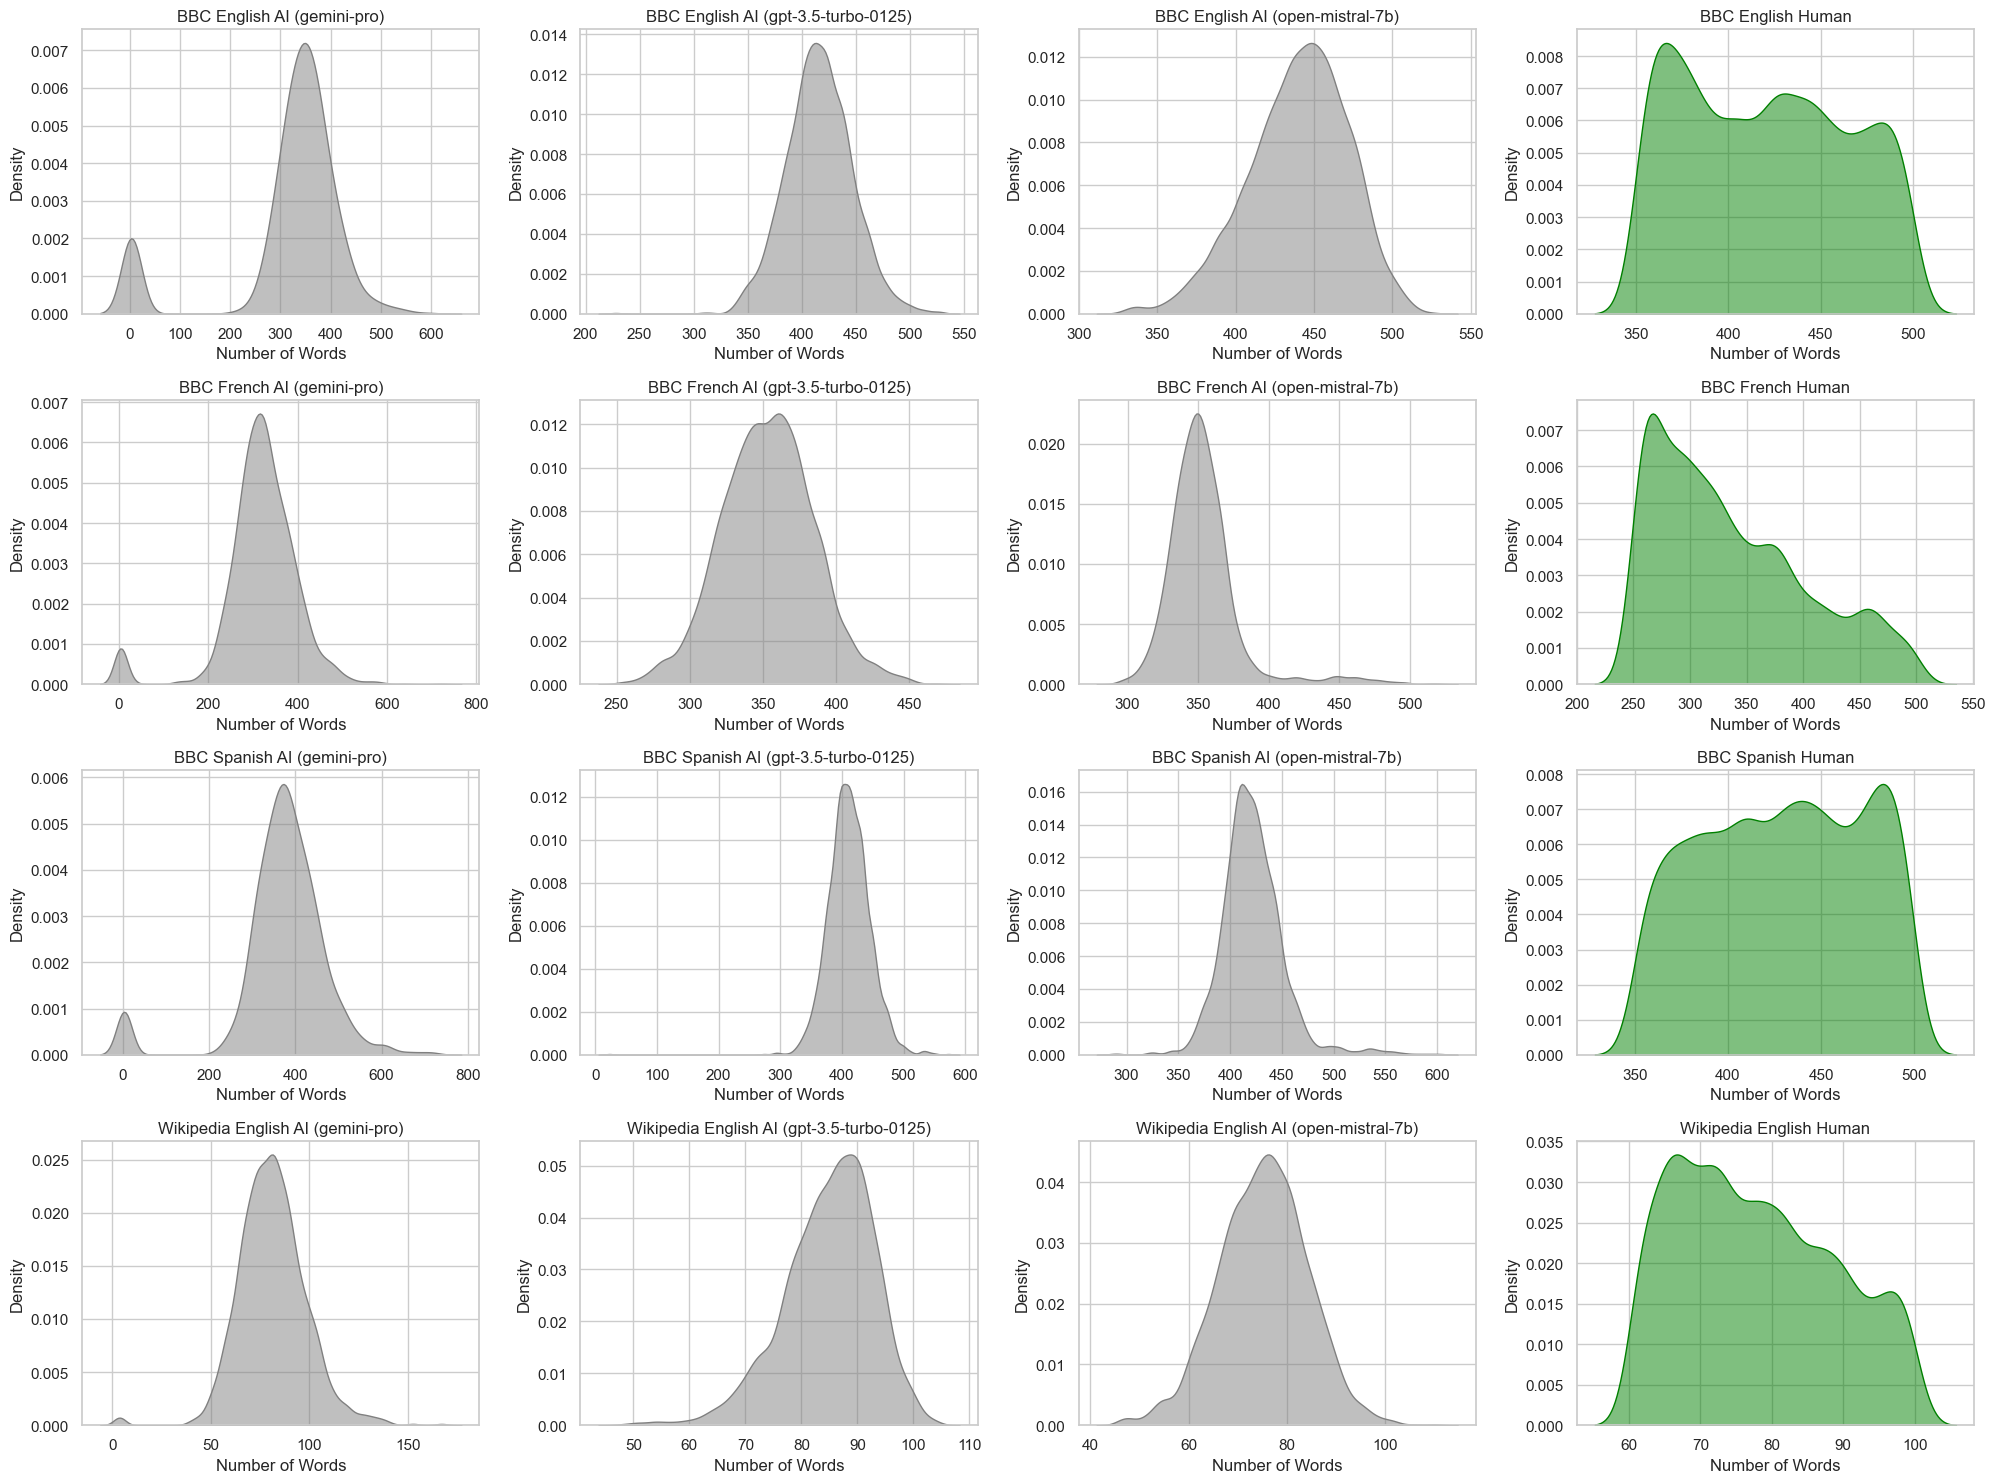

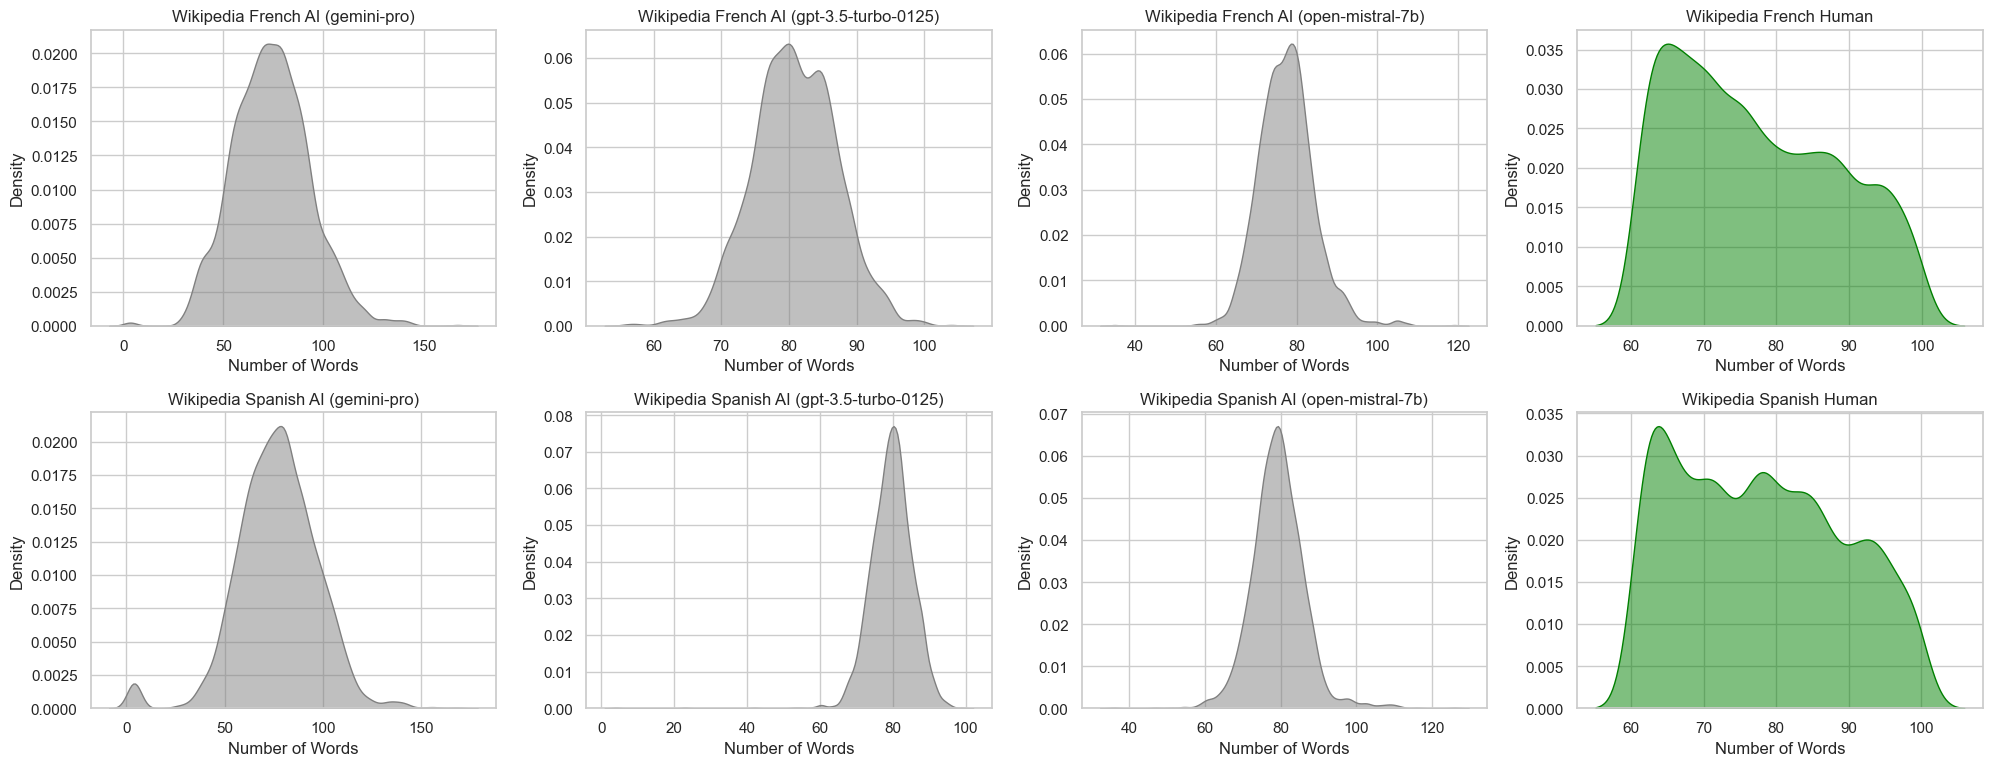

In [7]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the directory where the files are stored
directory = 'C:/Users/amirm/Desktop/MONASH/Thesis/Working/Prepare/Code/2_Gen_Ai_Text/Combine_Datasets/Output_Files'

#--------------------------------------------

def process_files(directory):
    data = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_csv(file_path)
            df['word_count'] = df['text'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
            df['description'] = df.apply(
                lambda row: f"{row['domain']} {row['language']} Human" if row['write_by'] == 'Human'
                else f"{row['domain']} {row['language']} AI ({row['LLM_model']})", axis=1)
            data.append(df[['description', 'word_count']])
    return pd.concat(data)

#--------------------------------------------

# Generate plots
def generate_plots(data):
    descriptions = data['description'].unique()
    plots_per_figure = 16  # Adjust the number of plots per figure
    total_plots = len(descriptions)
    num_figures = (total_plots + plots_per_figure - 1) // plots_per_figure
    
    for fig_idx in range(num_figures):
        plt.figure(figsize=(20, 15))
        start_idx = fig_idx * plots_per_figure
        end_idx = min((fig_idx + 1) * plots_per_figure, total_plots)
        
        for i, description in enumerate(descriptions[start_idx:end_idx]):
            ax = plt.subplot(4, 4, i + 1)  # Configuring 4x4 subplots per figure
            subset = data[data['description'] == description]
            # sns.violinplot(y=subset['word_count'], color='blue' if 'Human' in description else 'red', inner="quartile", alpha=0.6, bw_adjust=0.2, ax=ax)
            sns.kdeplot(x=subset['word_count'], color='green' if 'Human' in description else 'gray', alpha=0.5, bw_adjust=0.8, ax=ax, fill=True)
            ax.set_title(description)
            ax.set_xlabel('Number of Words')
            ax.set_ylabel('Density')

        plt.tight_layout()
        plt.show()

#--------------------------------------------

data = process_files(directory)
generate_plots(data)


**In this segment of the Python script, we define a function to remove outliers from the word count data of our text datasets. After applying this function to refine our dataset, we generate new plots to visualize the adjusted distributions. This step ensures a more accurate comparison between AI-generated and human-written texts in English, Spanish, and French from BBC and Wikipedia sources.**

C:\Users\amirm\AppData\Local\Temp\ipykernel_5760\4189557049.py:82: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('description').apply(remove_outliers).reset_index(drop=True)


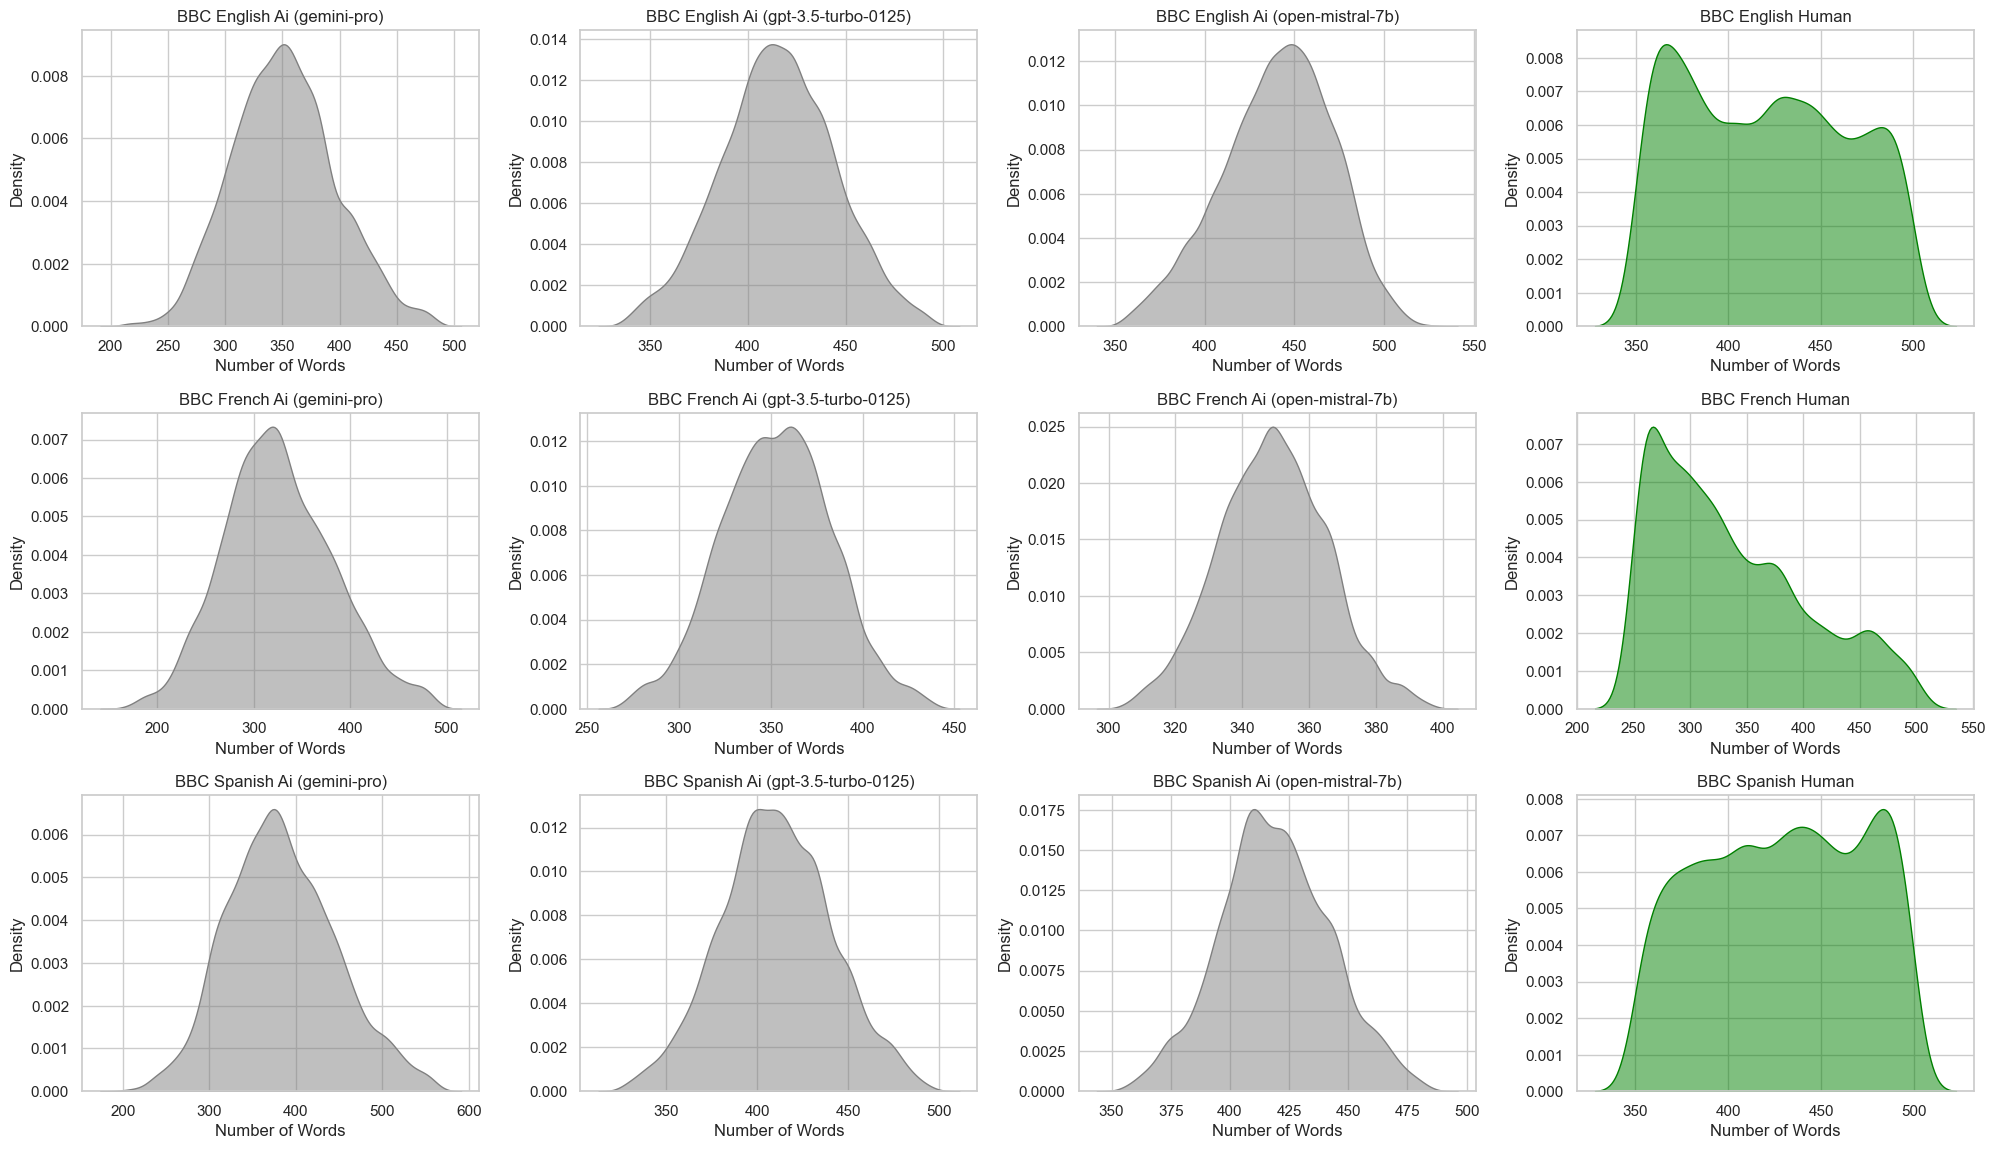

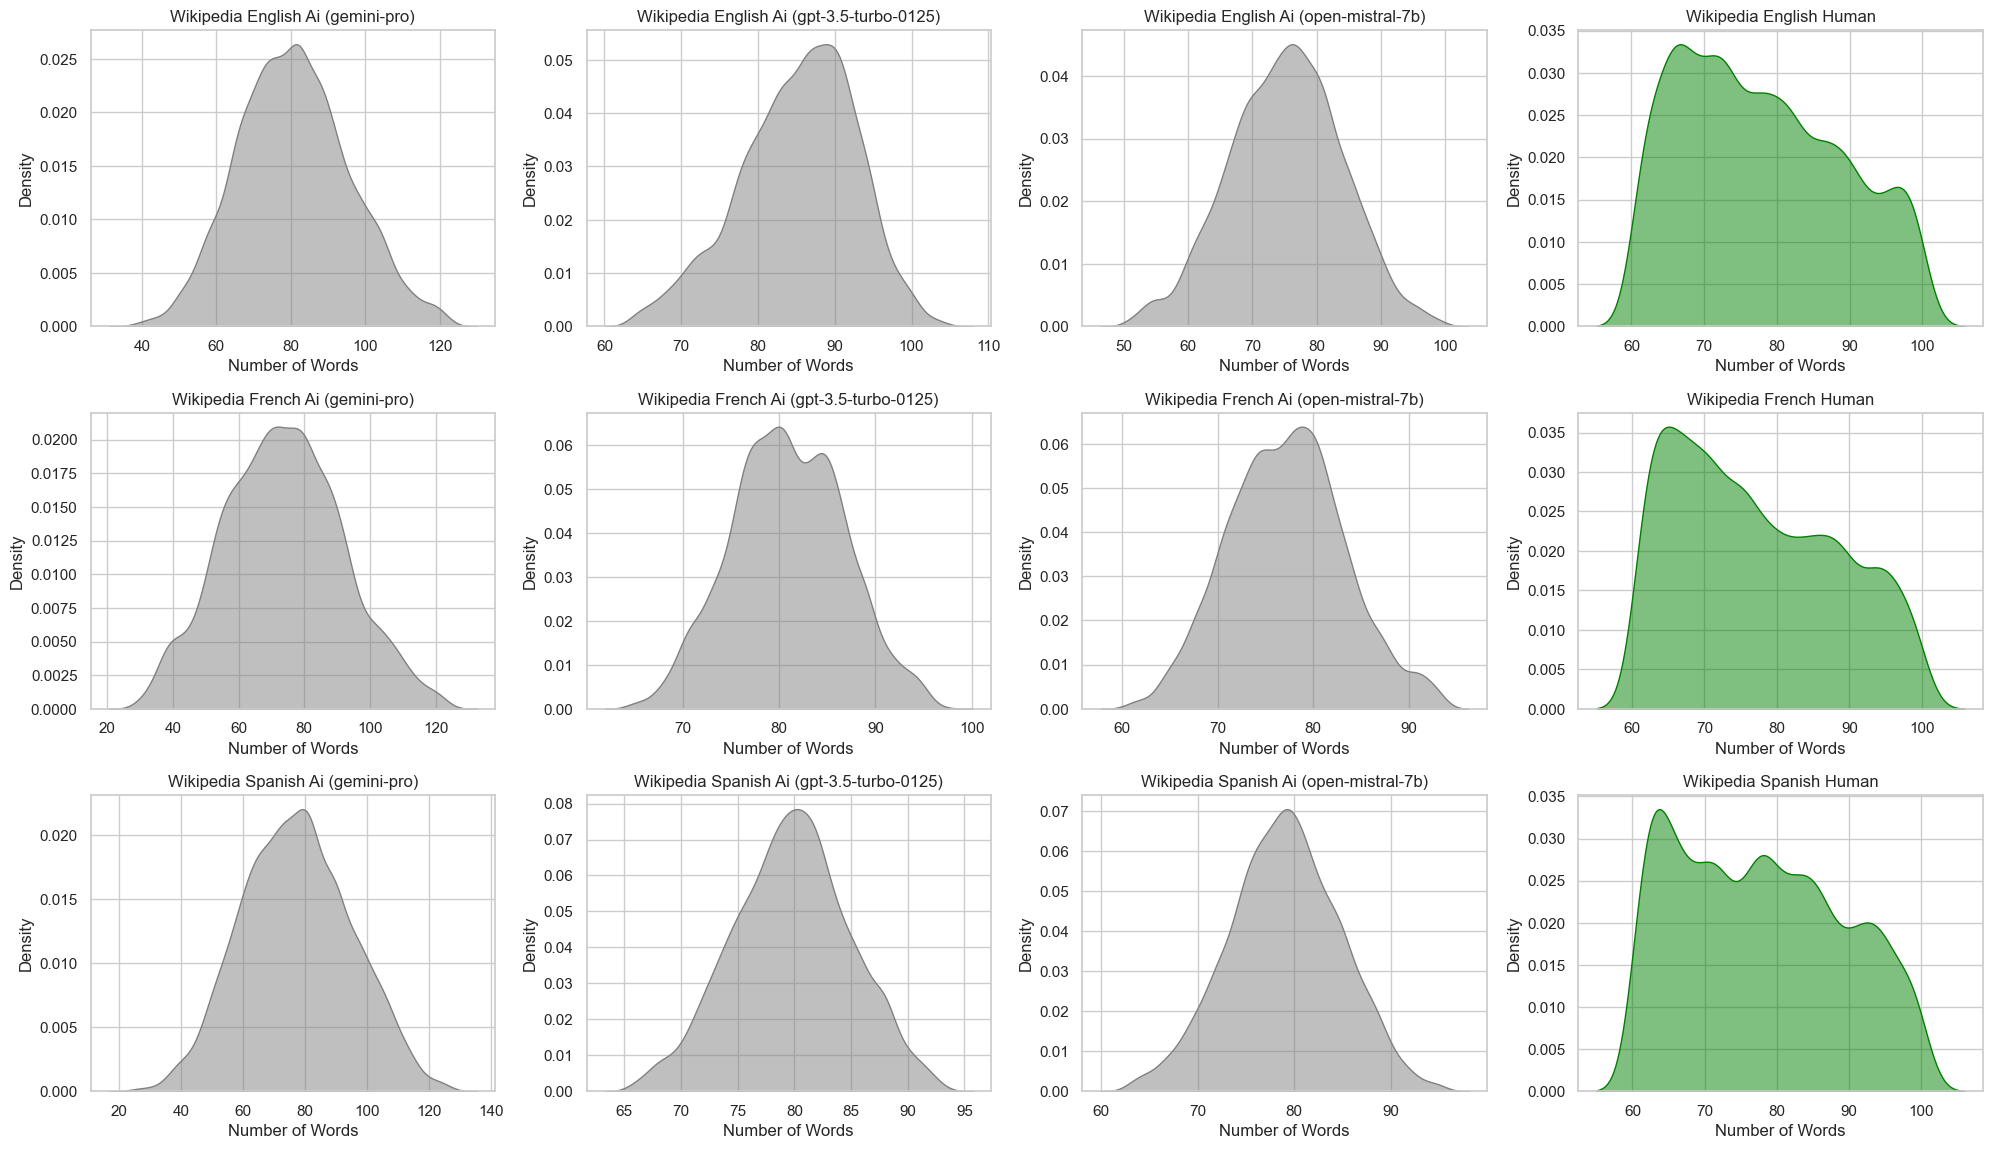

In [91]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the directory where the files are stored
directory = 'C:/Users/amirm/Desktop/MONASH/Thesis/Working/Prepare/Code/Gen_Ai_Text/Combine_Datasets/Output_Files'

#--------------------------------------------

def process_files(directory):
    data = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_csv(file_path)
            # Calculate the number of words in the 'text' column
            df['word_count'] = df['text'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
            # Extract description from the filename, assuming structure is consistent and informational
            description = file_name.replace('.csv', '').replace('_', ' ') 
            df['description'] = description
            data.append(df[['description', 'word_count']])
    return pd.concat(data)

#--------------------------------------------

def remove_outliers(df):
    # Calculate Q1, Q3 and IQR
    Q1 = df['word_count'].quantile(0.25)
    Q3 = df['word_count'].quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return data without outliers
    return df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]

#--------------------------------------------

# Generate plots
def generate_plots(data):
    descriptions = data['description'].unique()
    plots_per_figure = 12  # Adjust the number of plots per figure
    total_plots = len(descriptions)
    num_figures = (total_plots + plots_per_figure - 1) // plots_per_figure
    
    for fig_idx in range(num_figures):
        plt.figure(figsize=(20, 15))
        start_idx = fig_idx * plots_per_figure
        end_idx = min((fig_idx + 1) * plots_per_figure, total_plots)
        
        for i, description in enumerate(descriptions[start_idx:end_idx]):
            ax = plt.subplot(4, 4, i + 1)  # Configuring 4x4 subplots per figure
            subset = data[data['description'] == description]
            # sns.violinplot(y=subset['word_count'], color='blue' if 'Human' in description else 'red', inner="quartile", alpha=0.7, bw_adjust=0.2, ax=ax)
            sns.kdeplot(x=subset['word_count'], color='green' if 'Human' in description else 'gray', alpha=0.5, bw_adjust=0.8, ax=ax, fill=True)
            ax.set_title(description)
            ax.set_xlabel('Number of Words')
            ax.set_ylabel('Density')


        plt.tight_layout()
        plt.show()

#--------------------------------------------

data = process_files(directory)

# Apply outlier removal
data = data.groupby('description').apply(remove_outliers).reset_index(drop=True)

generate_plots(data)


**This refined portion of the script is presenting a focused comparison of word count distributions between AI and human-written texts in selected datasets. By consolidating the word counts from texts generated by three different AI models, we compare the unified AI output to human texts across English, Spanish, and French languages in both BBC and Wikipedia domains. The script generates a concise set of six plots, one for each language and domain pairing, allowing for a clearer and more compact visual representation.**

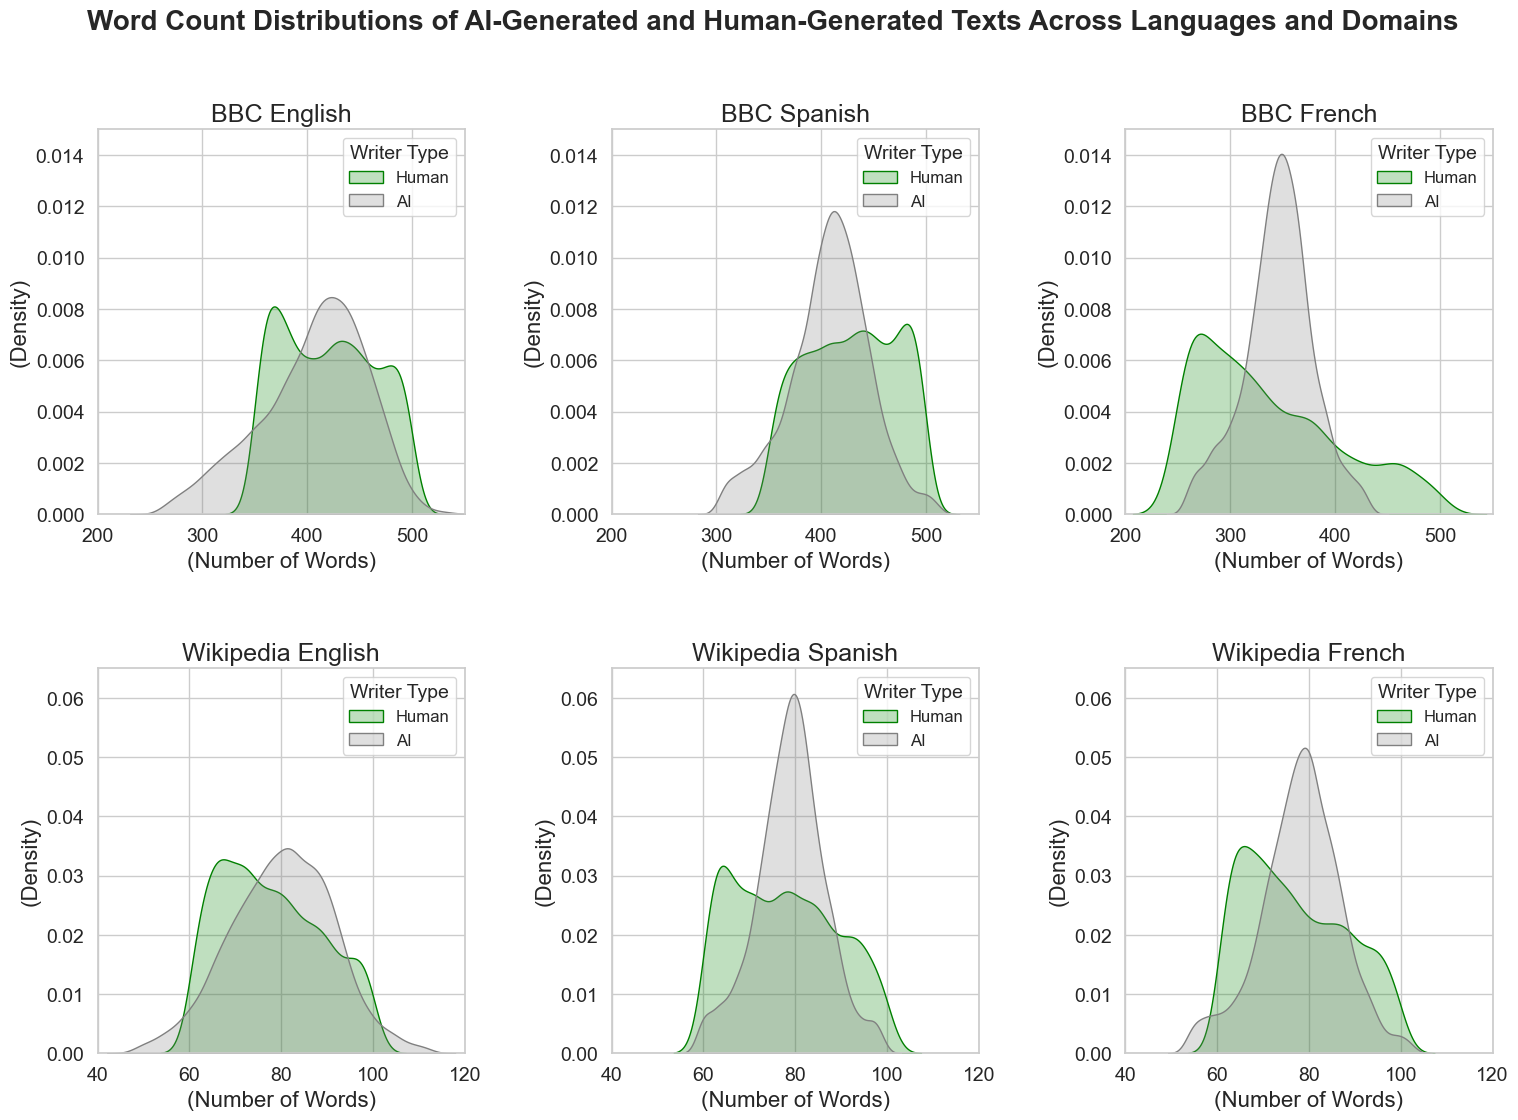

In [6]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the directory where the files are stored
directory = 'C:/Users/amirm/Desktop/MONASH/Thesis/Working/Prepare/Code/2_Gen_Ai_Text/Combine_Datasets/Output_Files'

# Define the directory where plots will be saved
save_path = 'C:/Users/amirm/Desktop/MONASH/Thesis/Working/Prepare/Images'


# Ensure the save_path exists
os.makedirs(save_path, exist_ok=True)

#--------------------------------------------

# Process files to extract and calculate the necessary data
def process_files(directory):
    data = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            df = pd.read_csv(file_path)
            df['word_count'] = df['text'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
            if 'Human' in file_name:
                writer = 'Human'
            else:
                writer = 'AI'
            domain_language = ' '.join(file_name.split('_')[:2])
            df['description'] = f"{domain_language} {writer}"
            data.append(df[['description', 'word_count']])
    return pd.concat(data)

#--------------------------------------------

# Function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df['word_count'].quantile(0.25)
    Q3 = df['word_count'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]

#--------------------------------------------

# Function to generate and save plots for specified descriptions
def generate_plots(data, descriptions, plot_row_titles):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    fig.suptitle('Word Count Distributions of AI-Generated and Human-Generated Texts Across Languages and Domains', fontsize=20, weight='bold')

    for i, desc in enumerate(descriptions):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        colors = {'Human': 'green', 'AI': 'gray'}
        for writer_type in ['Human', 'AI']:
            subset = data[data['description'].str.contains(desc) & data['description'].str.contains(writer_type)]
            subset = remove_outliers(subset)  # Apply outlier removal
            sns.kdeplot(x=subset['word_count'], ax=ax, label=writer_type, fill=True, color=colors[writer_type])
        ax.set_title(plot_row_titles[i], fontsize=18)
        ax.set_xlabel('(Number of Words)', fontsize=16)
        ax.set_ylabel('(Density)', fontsize=16)
        ax.legend(title="Writer Type", fontsize=12, title_fontsize=14)

        # Increase the font size of tick labels
        ax.tick_params(axis='both', which='major', labelsize=14)

        # Set axis limits based on the domain
        if 'BBC' in desc:
            ax.set_xlim(200, 550)
            ax.set_ylim(0, 0.015)
        elif 'Wikipedia' in desc:
            ax.set_xlim(40, 120)
            ax.set_ylim(0, 0.065)

    plt.savefig(f"{save_path}/word_count_distributions.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()  # Display the plots after saving
    plt.close(fig)  # Close the figure after showing to free up memory

#--------------------------------------------

data = process_files(directory)

# Define plot details
descriptions = [
    'BBC English', 'BBC Spanish', 'BBC French', 
    'Wikipedia English', 'Wikipedia Spanish', 'Wikipedia French'
]
plot_titles = [
    'BBC English', 'BBC Spanish', 'BBC French', 
    'Wikipedia English', 'Wikipedia Spanish', 'Wikipedia French'
]

# Generate the specified plots
generate_plots(data, descriptions, plot_titles)
